<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-612235-1698851888/blob/main/Project_Folders/Project%20Development%20phase/Project%20Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
df=pd.read_csv('./test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean(),inplace=True)

In [ ]:
df["Arrival Delay in Minutes"]

0        44.0
1         0.0
2         0.0
3         6.0
4        20.0
         ... 
25971     0.0
25972     0.0
25973     0.0
25974     0.0
25975     0.0
Name: Arrival Delay in Minutes, Length: 25976, dtype: float64

In [ ]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df['Gender'].unique()
df['Customer Type'].unique()
df['Type of Travel'].unique()
df['Class'].unique()
df['satisfaction'].unique()


array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Customer Type']=le.fit_transform(df['Customer Type'])
df['Type of Travel']=le.fit_transform(df['Type of Travel'])
df['Class']=le.fit_transform(df['Class'])
df['satisfaction']=le.fit_transform(df['satisfaction'])

In [ ]:
quant=df.quantile(q=[0.25,0.75],axis=0)
quant

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0.25,6493.75,32170.50,0.0,0.0,27.0,0.0,0.0,414.0,2.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0
0.75,19481.25,97584.25,1.0,0.0,51.0,1.0,1.0,1744.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0,1.0


In [ ]:
df['Customer Type']=np.where(df['Customer Type']>0.1,0,df['Customer Type'])
df['Customer Type']=np.where(df['Customer Type']<0,0,df['Customer Type'])


df['Flight Distance']=np.where(df['Flight Distance']>3700,1744,df['Flight Distance'])
df['Flight Distance']=np.where(df['Flight Distance']<0,414,df['Flight Distance'])


df['Checkin service']=np.where(df['Checkin service']>4.9,4.0,df['Checkin service'])
df['Checkin service']=np.where(df['Checkin service']<2,3.0,df['Checkin service'])


df['Departure Delay in Minutes']=np.where(df['Departure Delay in Minutes']>10,12,df['Departure Delay in Minutes'])
df['Departure Delay in Minutes']=np.where(df['Departure Delay in Minutes']<0,3.0,df['Departure Delay in Minutes'])


df['Arrival Delay in Minutes']=np.where(df['Arrival Delay in Minutes']>10,13,df['Arrival Delay in Minutes'])
df['Arrival Delay in Minutes']=np.where(df['Arrival Delay in Minutes']<0,3.0,df['Arrival Delay in Minutes'])

In [ ]:
df.describe()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.0,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,12987.500000,65005.657992,0.492917,0.0,39.620958,0.305590,0.592778,1139.209386,2.724746,3.046812,...,3.357753,3.385664,3.350169,3.633238,3.359293,3.649253,3.286226,3.977248,4.416615,0.438982
std,7498.769632,37611.526647,0.499959,0.0,15.135685,0.460666,0.623703,903.981285,1.335384,1.533371,...,1.338299,1.282088,1.318862,1.176525,0.690865,1.180681,1.319330,5.245509,5.735476,0.496272
min,0.000000,17.000000,0.000000,0.0,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6493.750000,32170.500000,0.000000,0.0,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,12987.500000,65319.500000,0.000000,0.0,40.000000,0.000000,1.000000,849.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,19481.250000,97584.250000,1.000000,0.0,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,25975.000000,129877.000000,1.000000,0.0,85.000000,1.000000,2.000000,3700.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,12.000000,13.000000,1.000000


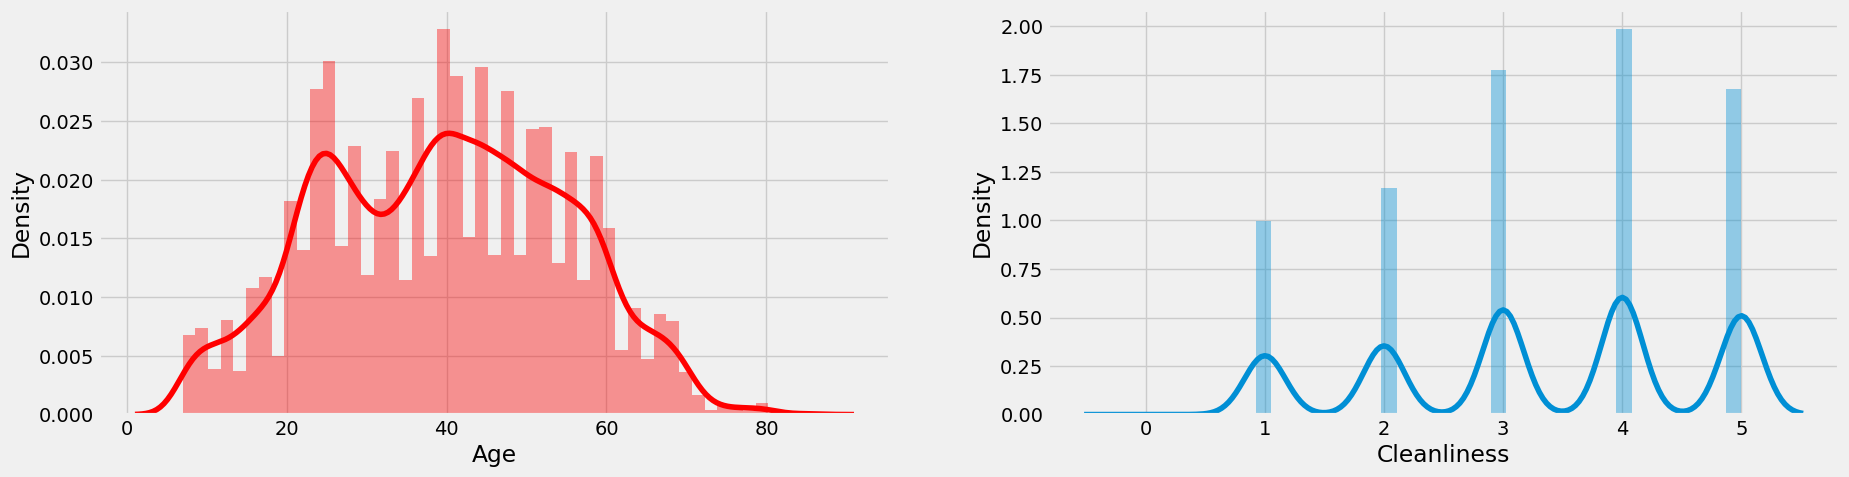

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Age'],color='r')
plt.subplot(122)
sns.distplot(df['Cleanliness'])
plt.show()

<Axes: ylabel='count'>

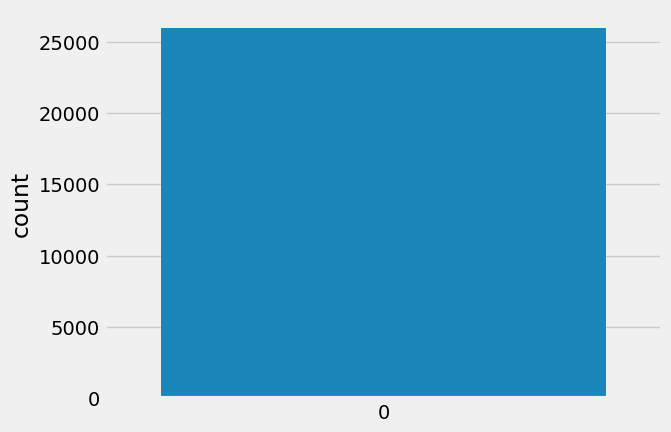

In [ ]:
sns.countplot(df['satisfaction'])

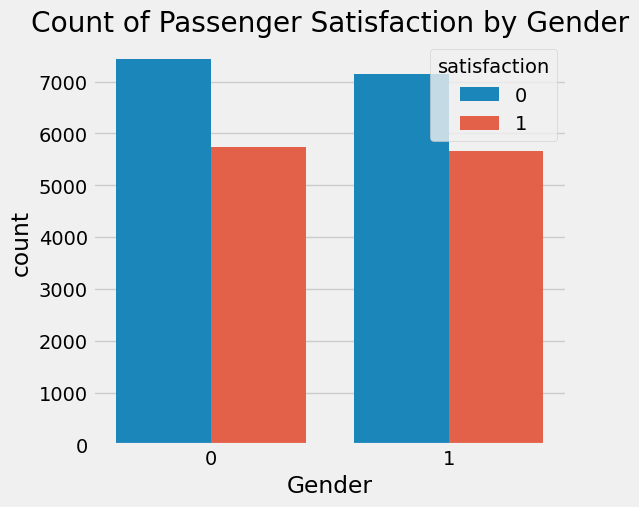

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.countplot(x='Gender', hue='satisfaction', data=df)
plt.title('Count of Passenger Satisfaction by Gender')
plt.show()

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,df['satisfaction'],test_size=0.2,random_state=42)

In [ ]:
x_train.shape,y_train.shape

((20780, 24), (20780,))

In [ ]:
x_test.shape,y_test.shape

((5196, 24), (5196,))

In [ ]:
# !pip install joblib
import joblib
def RF(x_train,y_train,x_test,y_test, save_model=False):
    reg4=RandomForestClassifier()
    reg4.fit(x_train,y_train)
    print('Accuracy')
    print('Training accuracy=',reg4.score(x_train,y_train))
    print('Test accuracy=',reg4.score(x_test,y_test))
    y_test_pred2=reg4.predict(x_test)
    print('Test data confusion  matrix:',confusion_matrix(y_test,y_test_pred2))
    print('Test data classification report:',classification_report(y_test,y_test_pred2))
    if save_model:
        joblib.dump(reg4, 'airline_model')  # Save the model to a file
    return reg4

In [ ]:
#Random Forest
Airline2 = RF(x_train, y_train, x_test, y_test,save_model=True)
Airline2.predict([[1,2,1,3,1,0,7,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

Accuracy
Training accuracy= 1.0
Test accuracy= 0.9459199384141648
Test data confusion  matrix: [[2835  110]
 [ 171 2080]]
Test data classification report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2945
           1       0.95      0.92      0.94      2251

    accuracy                           0.95      5196
   macro avg       0.95      0.94      0.94      5196
weighted avg       0.95      0.95      0.95      5196



array([1])

In [ ]:
RF(x_train,y_train,x_test,y_test)

Accuracy
Training accuracy= 1.0
Test accuracy= 0.9464973056197075
Test data confusion  matrix: [[2837  108]
 [ 170 2081]]
Test data classification report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2945
           1       0.95      0.92      0.94      2251

    accuracy                           0.95      5196
   macro avg       0.95      0.94      0.95      5196
weighted avg       0.95      0.95      0.95      5196



RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [ ]:
parameters={
    'n_estimators':[25,50,200,300],
    'criterion':['gini','entropy'],
    'max_depth':[14,20,25,30]
}

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,0,52,0,1,160,5,4,...,5,5,5,5,2.0,5,5,12.0,13.0,1
1,1,90035,0,0,36,0,0,2863,1,1,...,4,4,4,4,3.0,4,5,0.0,0.0,1
2,2,12360,1,0,20,0,1,192,2,0,...,2,4,1,3,2.0,2,2,0.0,0.0,0
3,3,77959,1,0,44,0,0,3377,0,0,...,1,1,1,1,3.0,1,4,0.0,6.0,1
4,4,36875,0,0,49,0,1,1182,2,3,...,2,2,2,2,4.0,2,4,0.0,13.0,1


In [ ]:
grid_search=GridSearchCV(estimator=forest,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print('best_accuracy=',grid_search.best_score_)
print('best_parameters=',grid_search.best_params_)

best_accuracy= 0.9490856592877768
best_parameters= {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 200}


In [ ]:
random=RandomForestClassifier(criterion='gini',max_depth=30,n_estimators=200)
random.fit(x_train,y_train)
y_pred=random.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
cm

array([[2834,  111],
       [ 167, 2084]])

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print('Accuracy after tuning the model:')
acc

Accuracy after tuning the model:


0.9464973056197075

In [ ]:
import pickle

with open("./AirlinePassengers.pkl", "wb") as f: pickle.dump(random, f)

Airline = pickle.load(open("./AirlinePassengers.pkl", "rb"))

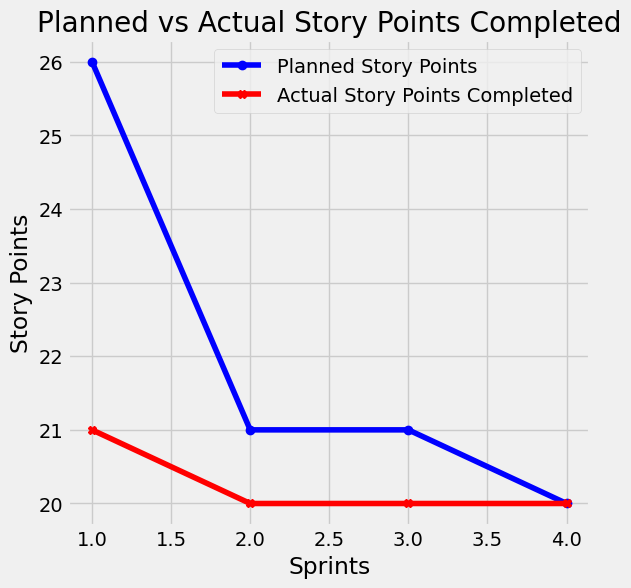

In [ ]:
import matplotlib.pyplot as plt

# Planned Story Points data
planned_sprints = [1, 2, 3, 4]
planned_points = [26, 21, 21, 20]

# Actual Story Points Completed data
actual_sprints = [1, 2, 3, 4]
actual_points = [21, 20, 20, 20]

plt.figure(figsize=(6, 6))

# Plotting the Planned Story Points
plt.plot(planned_sprints, planned_points, marker='o', linestyle='-', color='blue', label='Planned Story Points')

# Plotting the Actual Story Points Completed
plt.plot(actual_sprints, actual_points, marker='X', linestyle='-', color='red', label='Actual Story Points Completed')

# X-axis and Y-axis labels
plt.xlabel('Sprints')
plt.ylabel('Story Points')

# Title of the plot
plt.title('Planned vs Actual Story Points Completed')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()
